SASA values have been written to mousecyssasa.dat


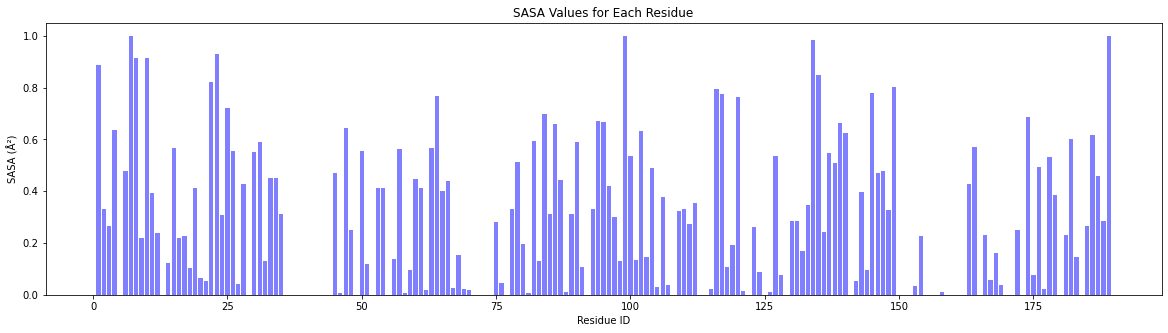

In [5]:
from Bio.PDB import PDBParser, DSSP
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Parse the PDB file
pdb_file_path = 'MouseCys.pdb'         # Specify the input file path
output_file_path = 'mousecyssasa.dat'  # Specify the output file path
parser = PDBParser(QUIET=True)
structure = parser.get_structure('protein', pdb_file_path)

# Step 2: Check if the structure contains models
if not structure:
    raise ValueError("No model found in the PDB file.")

# Step 3: Select the first model (you may need to adjust this based on your PDB file)
model = structure[0]

# Step 4: Check if the model contains chains
if not model:
    raise ValueError("No chain found in the PDB file.")

# Step 5: Calculate DSSP (Define Secondary Structure of Proteins)
try:
    dssp = DSSP(model, pdb_file_path)
except KeyError as e:
    raise ValueError(f"Error calculating DSSP: {e}")

# Step 6: Extract SASA values, filtering out 'NA'
sasa_values = np.array([float(aa[3]) if aa[3] != 'NA' else float('nan') for aa in dssp])

# Step 7: Write SASA values to a file
with open(output_file_path, 'w') as output_file:
    for residue_id, sasa in zip(model.get_residues(), sasa_values):
        output_file.write(f"Residue {residue_id}: SASA = {sasa:.2f} Å²\n")

print(f"SASA values have been written to {output_file_path}")

#increasing the plot size
plt.rcParams['figure.figsize'] = [20, 5]

# Step 8: Plot SASA values column-wise
residue_ids = [residue.id[1] for residue in model.get_residues()]

plt.bar(residue_ids, sasa_values, color='blue', alpha=0.5)
plt.title('SASA Values for Each Residue')
plt.xlabel('Residue ID')
plt.ylabel('SASA (Å²)')
plt.show()

SASA values have been written to mousecyssasa.dat


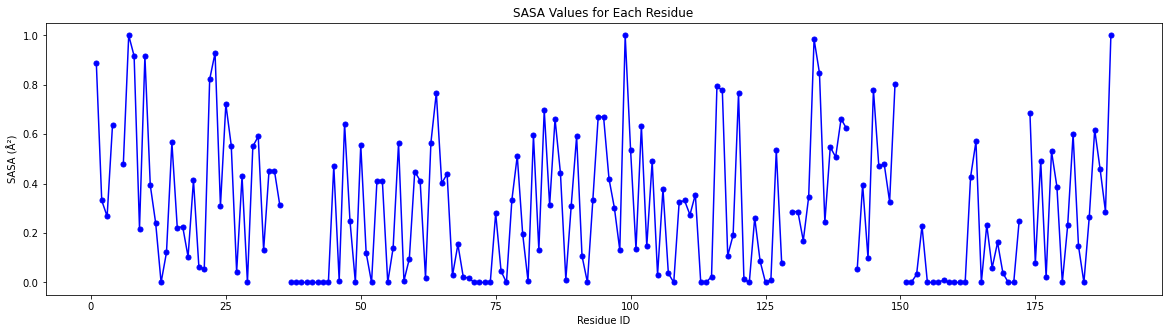

In [6]:
from Bio.PDB import PDBParser, DSSP
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Parse the PDB file
pdb_file_path = 'MouseCys.pdb'         # Specify the input file path
output_file_path = 'mousecyssasa.dat'  # Specify the output file path
parser = PDBParser(QUIET=True)
structure = parser.get_structure('protein', pdb_file_path)

# Step 2: Check if the structure contains models
if not structure:
    raise ValueError("No model found in the PDB file.")

# Step 3: Select the first model (you may need to adjust this based on your PDB file)
model = structure[0]

# Step 4: Check if the model contains chains
if not model:
    raise ValueError("No chain found in the PDB file.")

# Step 5: Calculate DSSP (Define Secondary Structure of Proteins)
try:
    dssp = DSSP(model, pdb_file_path)
except KeyError as e:
    raise ValueError(f"Error calculating DSSP: {e}")

# Step 6: Extract SASA values, filtering out 'NA'
sasa_values = np.array([float(aa[3]) if aa[3] != 'NA' else float('nan') for aa in dssp])

# Step 7: Write SASA values to a file
with open(output_file_path, 'w') as output_file:
    for residue_id, sasa in zip(model.get_residues(), sasa_values):
        output_file.write(f"Residue {residue_id}: SASA = {sasa:.2f} Å²\n")

print(f"SASA values have been written to {output_file_path}")

# Step 8: Plot SASA values as a line plot
residue_ids = [residue.id[1] for residue in model.get_residues()]

plt.plot(residue_ids, sasa_values, color='blue', marker='o', linestyle='-', markersize=5)
plt.title('SASA Values for Each Residue')
plt.xlabel('Residue ID')
plt.ylabel('SASA (Å²)')
plt.show()